# CERTIFICATION PROJECT 2

Objective: Our objective is to cluster the countries based on various sales data provided to us
across years. We have to apply an unsupervised learning technique like K means or
Hierarchical clustering so as to get the final solution. But before that we have to bring the
exports (in tons) of all countries down to same scale across years. Plus, as this solution needs
to be repeatable we will have to do PCA so as to get the principal components which explain
max variance.

# TASK 1

1. Read the data file and check for any missing values

In [2]:
import pandas as pd
import  numpy as np
data=pd.read_csv("Project_Data_1.csv",index_col=0,thousands=',')
#Check missing values
data.isnull().sum()


1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

# TASK 2

#2 Change the headers to country and year accordingly.


In [3]:
data.index.names=['Country']
data.columns.names=['Year']
data.head(5)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


# Dimensionality reduction with PCA 


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [5]:
existing_2d = pca.transform(data)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = data.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
Country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [6]:
#Varaince ratio
print(pca.explained_variance_ratio_)


[0.91808789 0.060556  ]


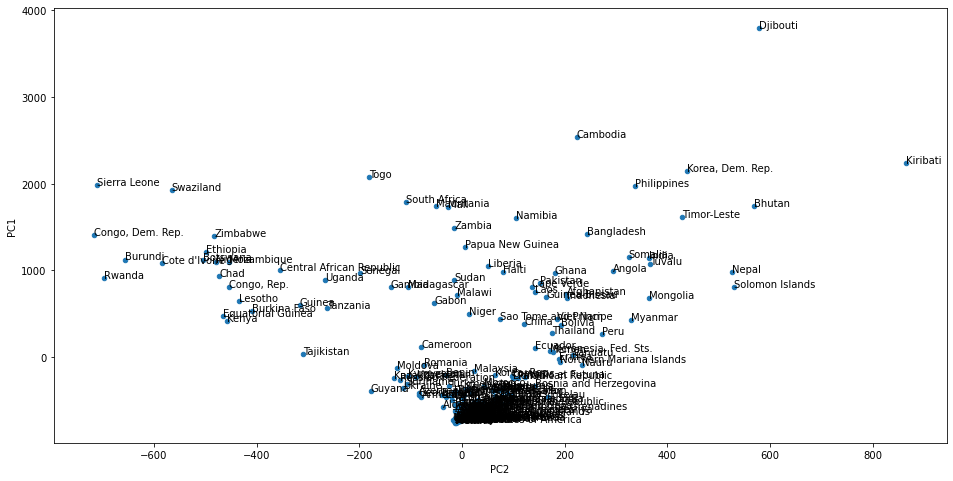

In [7]:
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(data.index):
    ax.annotate(country, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))

# Noramlise the data

<AxesSubplot:xlabel='PC2', ylabel='PC1'>

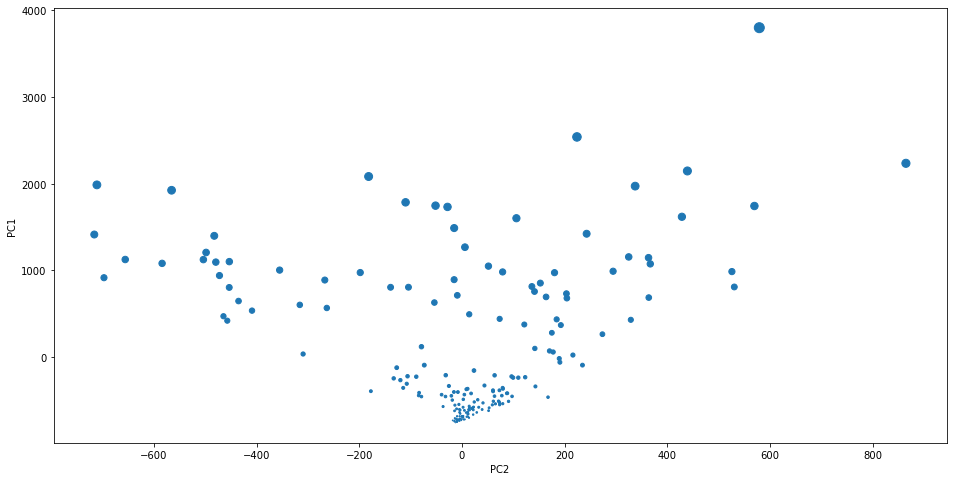

In [8]:
from sklearn.preprocessing import normalize

existing_df_2d['country_mean'] = pd.Series(data.mean(axis=1), index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(
    country_mean_scaled, 
    index=existing_df_2d.index)
existing_df_2d.head()
existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', s=existing_df_2d['country_mean_scaled']*100, figsize=(16,8))


<AxesSubplot:xlabel='PC2', ylabel='PC1'>

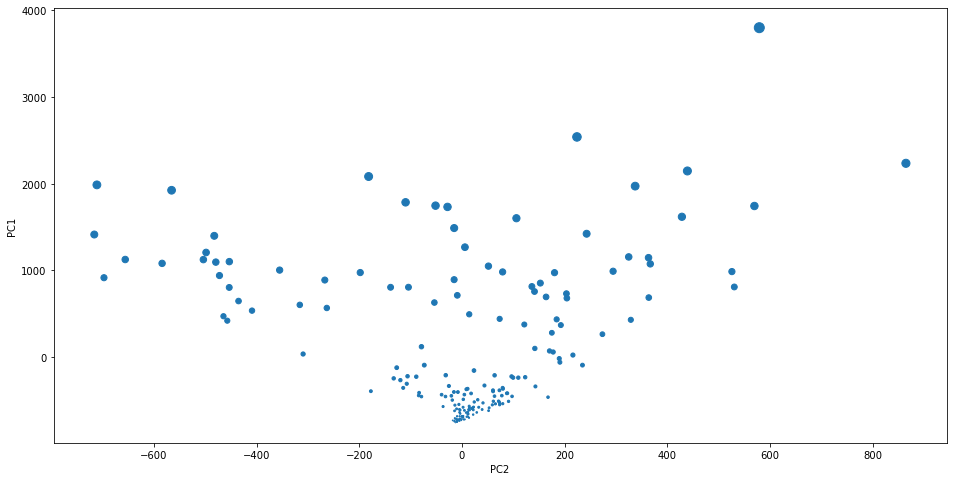

In [9]:
existing_df_2d['country_sum'] = pd.Series(data.sum(axis=1), index=existing_df_2d.index)
country_sum_max = existing_df_2d['country_sum'].max()
country_sum_min = existing_df_2d['country_sum'].min()
country_sum_scaled = (existing_df_2d.country_sum-country_sum_min) / country_sum_max
existing_df_2d['country_sum_scaled'] = pd.Series(country_sum_scaled,index=existing_df_2d.index)
existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', s=existing_df_2d['country_sum_scaled']*100, figsize=(16,8))

In [10]:
existing_df_2d['country_change'] = pd.Series(data['2007']-data['1990'], index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled = (existing_df_2d.country_change - country_change_min) / country_change_max
existing_df_2d['country_change_scaled'] = pd.Series(
    country_change_scaled, 
    index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
Country,,
Afghanistan,-198,0.850840
Albania,-20,1.224790
Algeria,11,1.289916
American Samoa,-37,1.189076
Andorra,-20,1.224790


# Plot elbow chart or scree plot to find out optimal number of clusters. 


In [11]:
from sklearn.cluster import KMeans
X=data.iloc[:,0:18].values

wcss = []
for i in range(1,11):                             
    kmeans = KMeans(n_clusters=i, init = "k-means++") 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print (wcss) 


[163288087.51690817, 45242917.57397291, 28285317.647039007, 23064463.049342368, 18497512.829820257, 13952325.188666737, 12112700.570501545, 10084319.9057757, 8625993.756362991, 7791922.698819009]


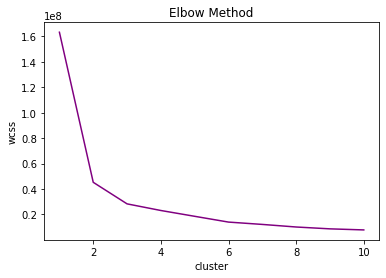

In [12]:
#Plotting the elbow chart
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss, c='purple')
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title('Elbow Method')
plt.show()

# k-means clustering


In [27]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(data)
 

In [28]:

existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)
existing_df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled,cluster
Country,,,,,,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731,6360,0.329731,-198,0.850840,1
Albania,-613.296510,4.715978,36.944444,0.032420,665,0.032420,-20,1.224790,0
Algeria,-569.303713,-36.837051,47.388889,0.042234,853,0.042234,11,1.289916,0
American Samoa,-717.082766,5.464696,12.277778,0.009240,221,0.009240,-37,1.189076,0
Andorra,-661.802241,11.037736,25.277778,0.021457,455,0.021457,-20,1.224790,0


C:\Users\ashwani.pathak\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashwani.pathak\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


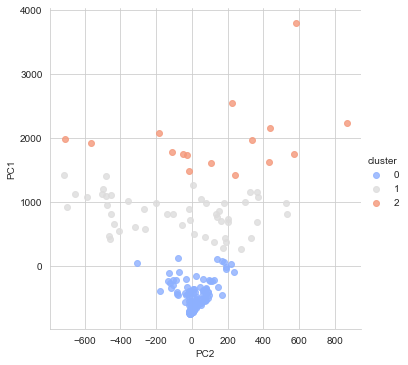

In [29]:
# plot the data 
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot('PC2', 'PC1',data=existing_df_2d, hue='cluster',
           palette='coolwarm',size=5,aspect=1,fit_reg=False)

C:\Users\ashwani.pathak\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


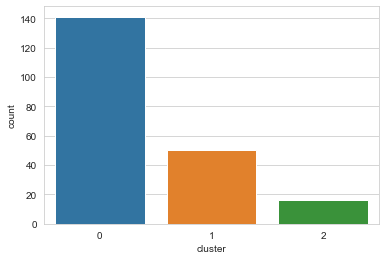

In [30]:
import seaborn as sns
sns.countplot(existing_df_2d['cluster'],label="Count")
plt.show()

# Hierarchical Clustering

# Using the dendrogram to find the optimal number of clusters

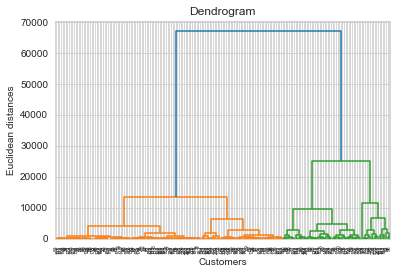

In [31]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(existing_df_2d, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Training the Hierarchical Clustering model on the dataset

In [32]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(existing_df_2d)

# Visualising the clusters

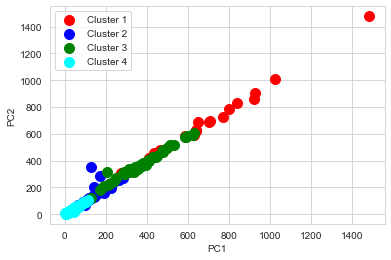

In [33]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()